In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
print("GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

GPUs Available:  1


In [4]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [14]:
roses=list(data_dir.glob('roses/*'))
tulips=list(data_dir.glob('tulips/*'))

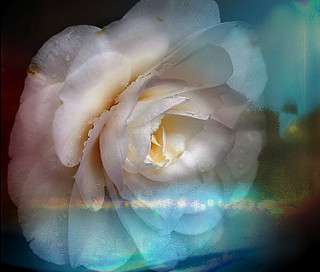

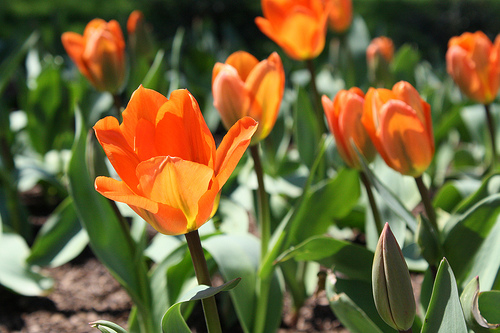

In [19]:
from IPython.display import Image
from IPython.display import display
x = PIL.Image.open(str(roses[500]))
y = PIL.Image.open(str(tulips[600]))
display(x, y)

## dataset creation

In [20]:
batch_size = 32
img_height = 180
img_width = 180

In [21]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [22]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [23]:
class_names = train_dataset.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [24]:
print(type(train_dataset.take(1)))

<class 'tensorflow.python.data.ops.dataset_ops.TakeDataset'>


In [25]:
train_dataset.take(1).__dict__

{'_input_dataset': <BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 '_count': <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 '_name': None,
 '_variant_tensor_attr': <tf.Tensor: shape=(), dtype=variant, value=<TakeDatasetOp::Dataset>>,
 '_graph_attr': <tensorflow.python.framework.ops.Graph at 0x26de24bd420>,
 '_options_attr': <tensorflow.python.data.ops.options.Options at 0x26de24bc280>}

### Tuple -> premier element du tuple -> image de tuple -> premiere image

In [26]:
[len(a) for a in list(train_dataset)[0]]

[32, 32]

In [27]:
list(train_dataset)[0][0].shape

TensorShape([32, 180, 180, 3])

In [28]:
list(train_dataset)[0][0][0].shape

TensorShape([180, 180, 3])

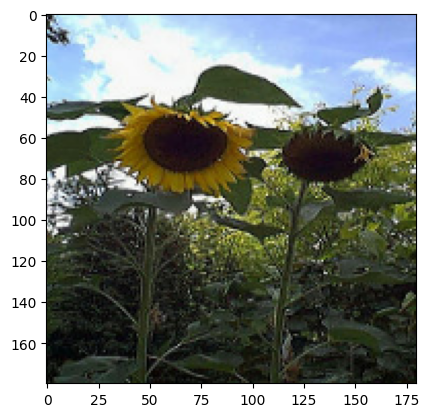

In [33]:
plt.imshow(list(train_dataset)[0][0][0].numpy().astype("uint8"))
##plt.title(class_names[labels[0]])
##plt.axis("off")


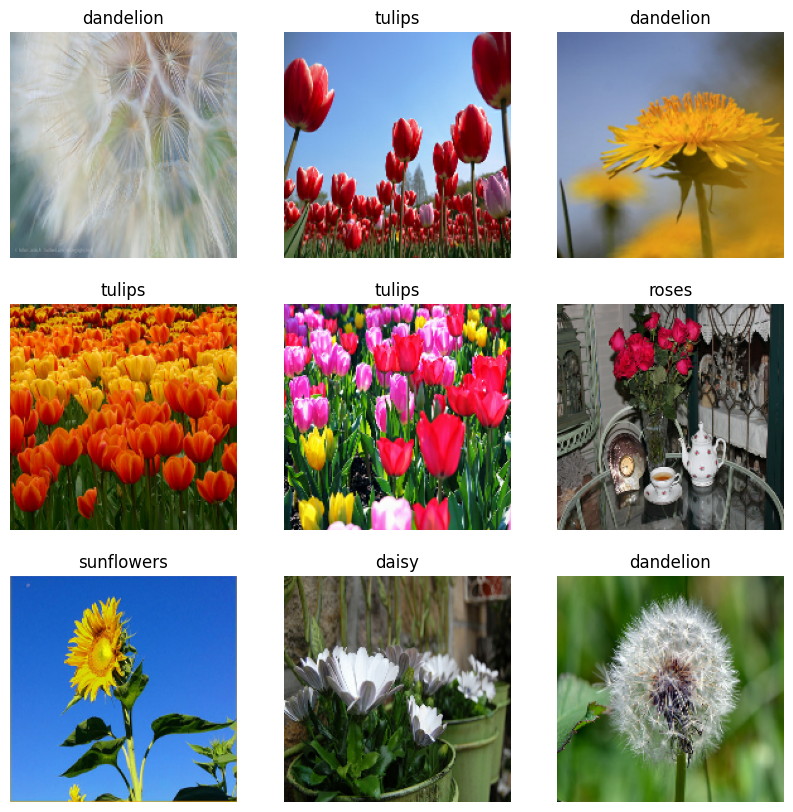

In [34]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [118]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [37]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

## Model creation


In [64]:
num_classes = len(class_names)

model1 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, kernel_size=(3, 3),padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [65]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [66]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 45, 45, 64)       

In [67]:
epochs=10
history = model1.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 3s 22ms/step - loss: 1.3441 - accuracy: 0.4257 - val_loss: 1.0814 - val_accuracy: 0.5477
Epoch 2/10
92/92 [==============================] - 2s 19ms/step - loss: 0.9917 - accuracy: 0.6087 - val_loss: 0.9691 - val_accuracy: 0.6362
Epoch 3/10
92/92 [==============================] - 2s 19ms/step - loss: 0.7763 - accuracy: 0.7054 - val_loss: 0.8774 - val_accuracy: 0.6771
Epoch 4/10
92/92 [==============================] - 2s 20ms/step - loss: 0.5654 - accuracy: 0.8014 - val_loss: 1.0280 - val_accuracy: 0.6172
Epoch 5/10
92/92 [==============================] - 2s 19ms/step - loss: 0.3661 - accuracy: 0.8706 - val_loss: 1.2222 - val_accuracy: 0.6403
Epoch 6/10
92/92 [==============================] - 2s 20ms/step - loss: 0.2098 - accuracy: 0.9292 - val_loss: 1.2302 - val_accuracy: 0.6526
Epoch 7/10
92/92 [==============================] - 2s 20ms/step - loss: 0.1470 - accuracy: 0.9588 - val_loss: 1.4739 - val_accuracy: 0.6458
Epoch 8/10
92

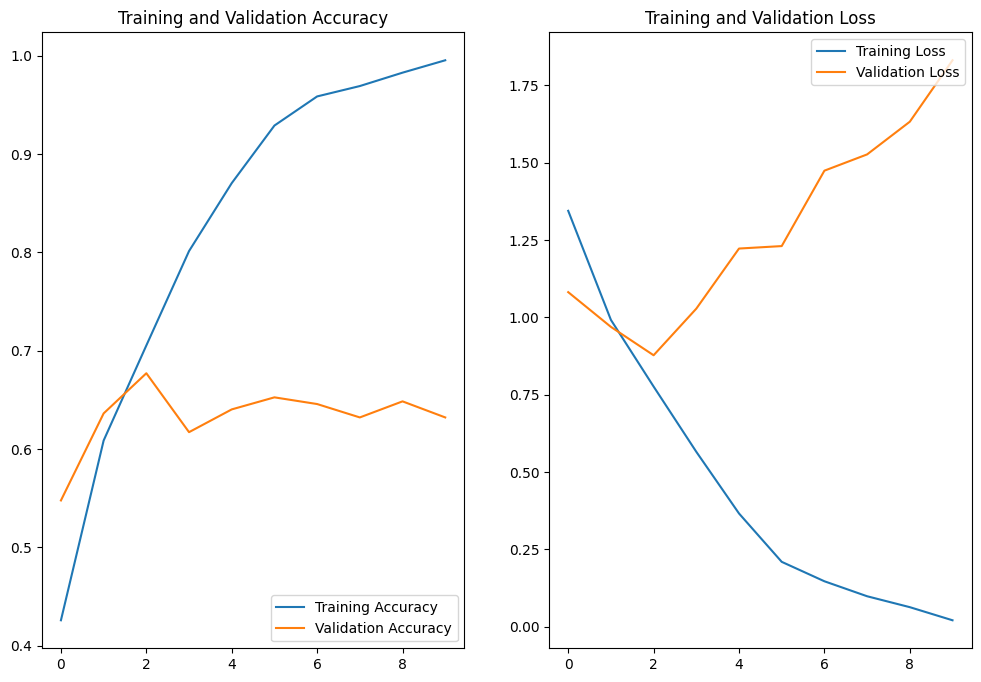

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Augmentation des données

In [74]:

tf.get_logger().setLevel('ERROR')


In [75]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

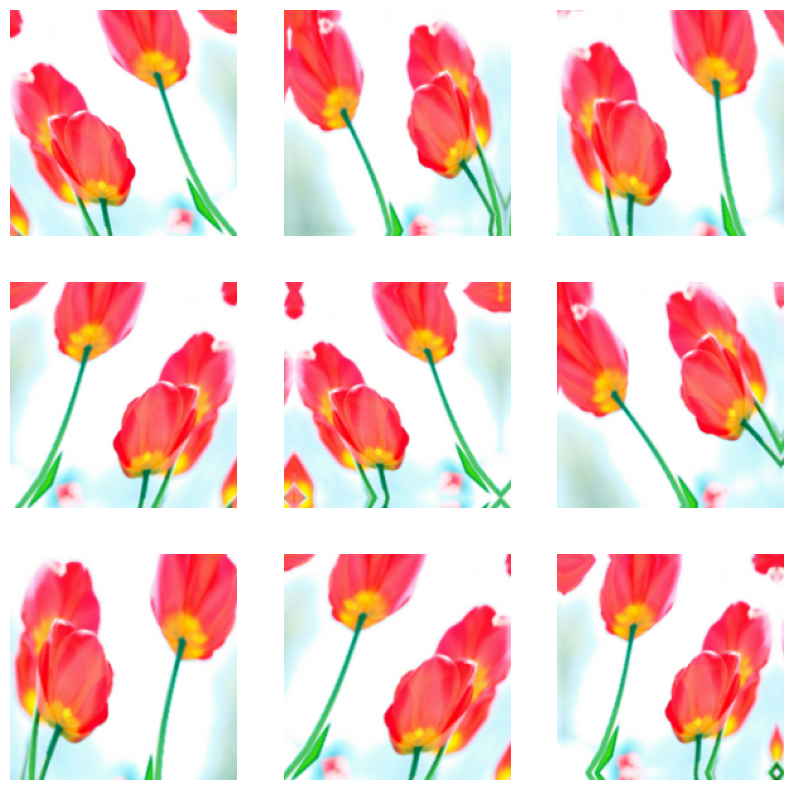

In [76]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [77]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [78]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_8 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [81]:
epochs = 15
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 20s 190ms/step - loss: 1.3761 - accuracy: 0.4084 - val_loss: 1.1489 - val_accuracy: 0.5368
Epoch 2/15
92/92 [==============================] - 16s 176ms/step - loss: 1.0732 - accuracy: 0.5794 - val_loss: 1.0095 - val_accuracy: 0.5858
Epoch 3/15
92/92 [==============================] - 17s 189ms/step - loss: 0.9753 - accuracy: 0.6151 - val_loss: 1.0462 - val_accuracy: 0.5831
Epoch 4/15
92/92 [==============================] - 19s 203ms/step - loss: 0.9022 - accuracy: 0.6505 - val_loss: 0.8846 - val_accuracy: 0.6403
Epoch 5/15
92/92 [==============================] - 18s 197ms/step - loss: 0.8357 - accuracy: 0.6747 - val_loss: 0.9687 - val_accuracy: 0.6172
Epoch 6/15
92/92 [==============================] - 19s 203ms/step - loss: 0.7801 - accuracy: 0.6911 - val_loss: 0.7929 - val_accuracy: 0.6812
Epoch 7/15
92/92 [==============================] - 18s 197ms/step - loss: 0.7426 - accuracy: 0.7136 - val_loss: 0.8424 - val_accuracy: 0.6785

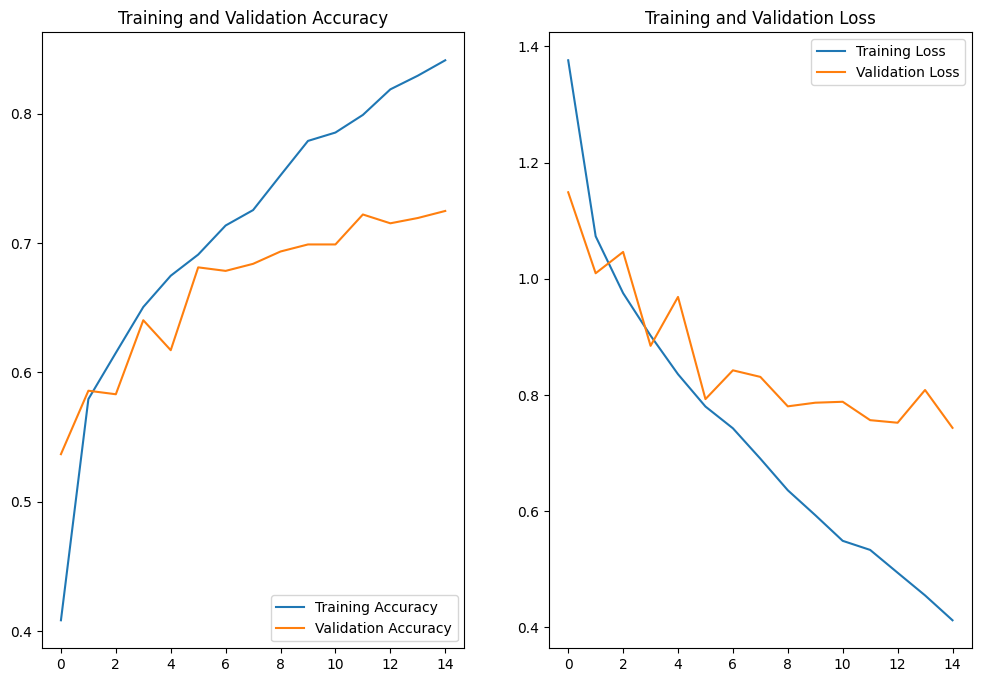

In [83]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [85]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 15ms/step
This image most likely belongs to sunflowers with a 99.49 percent confidence.
